In [1]:
# Fix imports when running from notebooks/ folder
import sys
from pathlib import Path

project_root = Path.cwd().parent 
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"Added to path: {project_root}")

%load_ext autoreload
%autoreload 2

Added to path: /Users/elshaday/DEV/10Academy/insurance-risk-analysis-week3


In [2]:
from src import DataManager 
from scripts.constants import Columns, NUMERIC_COLS, CATEGORY_COLS, DATE_COLS
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

In [3]:
dm = DataManager()
clean_insurance_df = dm.load_data()

Basic Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province 

/Users/elshaday/DEV/10Academy/insurance-risk-analysis-week3/src/data/manager.py:127: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[fill_false_col] = df_clean[fill_false_col].fillna(False)


Missing values handled!
Converting data types...


/Users/elshaday/DEV/10Academy/insurance-risk-analysis-week3/scripts/utils/parsers.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(series, errors="coerce")


Data types converted successfully!
Detecting outliers...
Outliers detected and flagged!
Removing Duplicates...
Duplicates removed...
Dropping rows with negative values...
Dropped 217 rows with negative values!
File saved to ../data/processed/cleaned_data.csv successfully!


In [4]:
clean_insurance_df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,Outlier_TotalPremium,Outlier_TotalClaims,Outlier_CustomValueEstimate
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,True,False,True
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,True,False,True
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,True,False,True
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,True,False,True
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,True,False,True


In [5]:
print("Data Summarization | Descriptive Stats")

# Variance
total_premium_var = clean_insurance_df[Columns.TotalPremium.value].var()
total_claims_var = clean_insurance_df[Columns.TotalClaims.value].var()

# Standard deviation
total_premium_std = clean_insurance_df[Columns.TotalPremium.value].std()
total_claims_std = clean_insurance_df[Columns.TotalClaims.value].std()

print("Total Premium -> STD:", total_premium_std, "Variance:", total_premium_var)
print("Total Claim -> STD:", total_claims_std, "Variance:", total_claims_var)

Data Summarization | Descriptive Stats
Total Premium -> STD: 163.53799891024707 Variance: 26744.677087567972
Total Claim -> STD: 2480.8587529147685 Variance: 6154660.15191382


In [6]:
print("Data Summarization | Data Structure")
clean_insurance_df.dtypes

Data Summarization | Data Structure


UnderwrittenCoverID                     int64
PolicyID                                int64
TransactionMonth               datetime64[ns]
IsVATRegistered                          bool
Citizenship                            object
LegalType                              object
Title                                  object
Language                               object
Bank                                   object
AccountType                            object
MaritalStatus                          object
Gender                                 object
Country                                object
Province                               object
PostalCode                              int64
MainCrestaZone                         object
SubCrestaZone                          object
ItemType                               object
mmcode                                float64
VehicleType                            object
RegistrationYear                        int64
make                              

Univariate Analysis | Numerical Columns


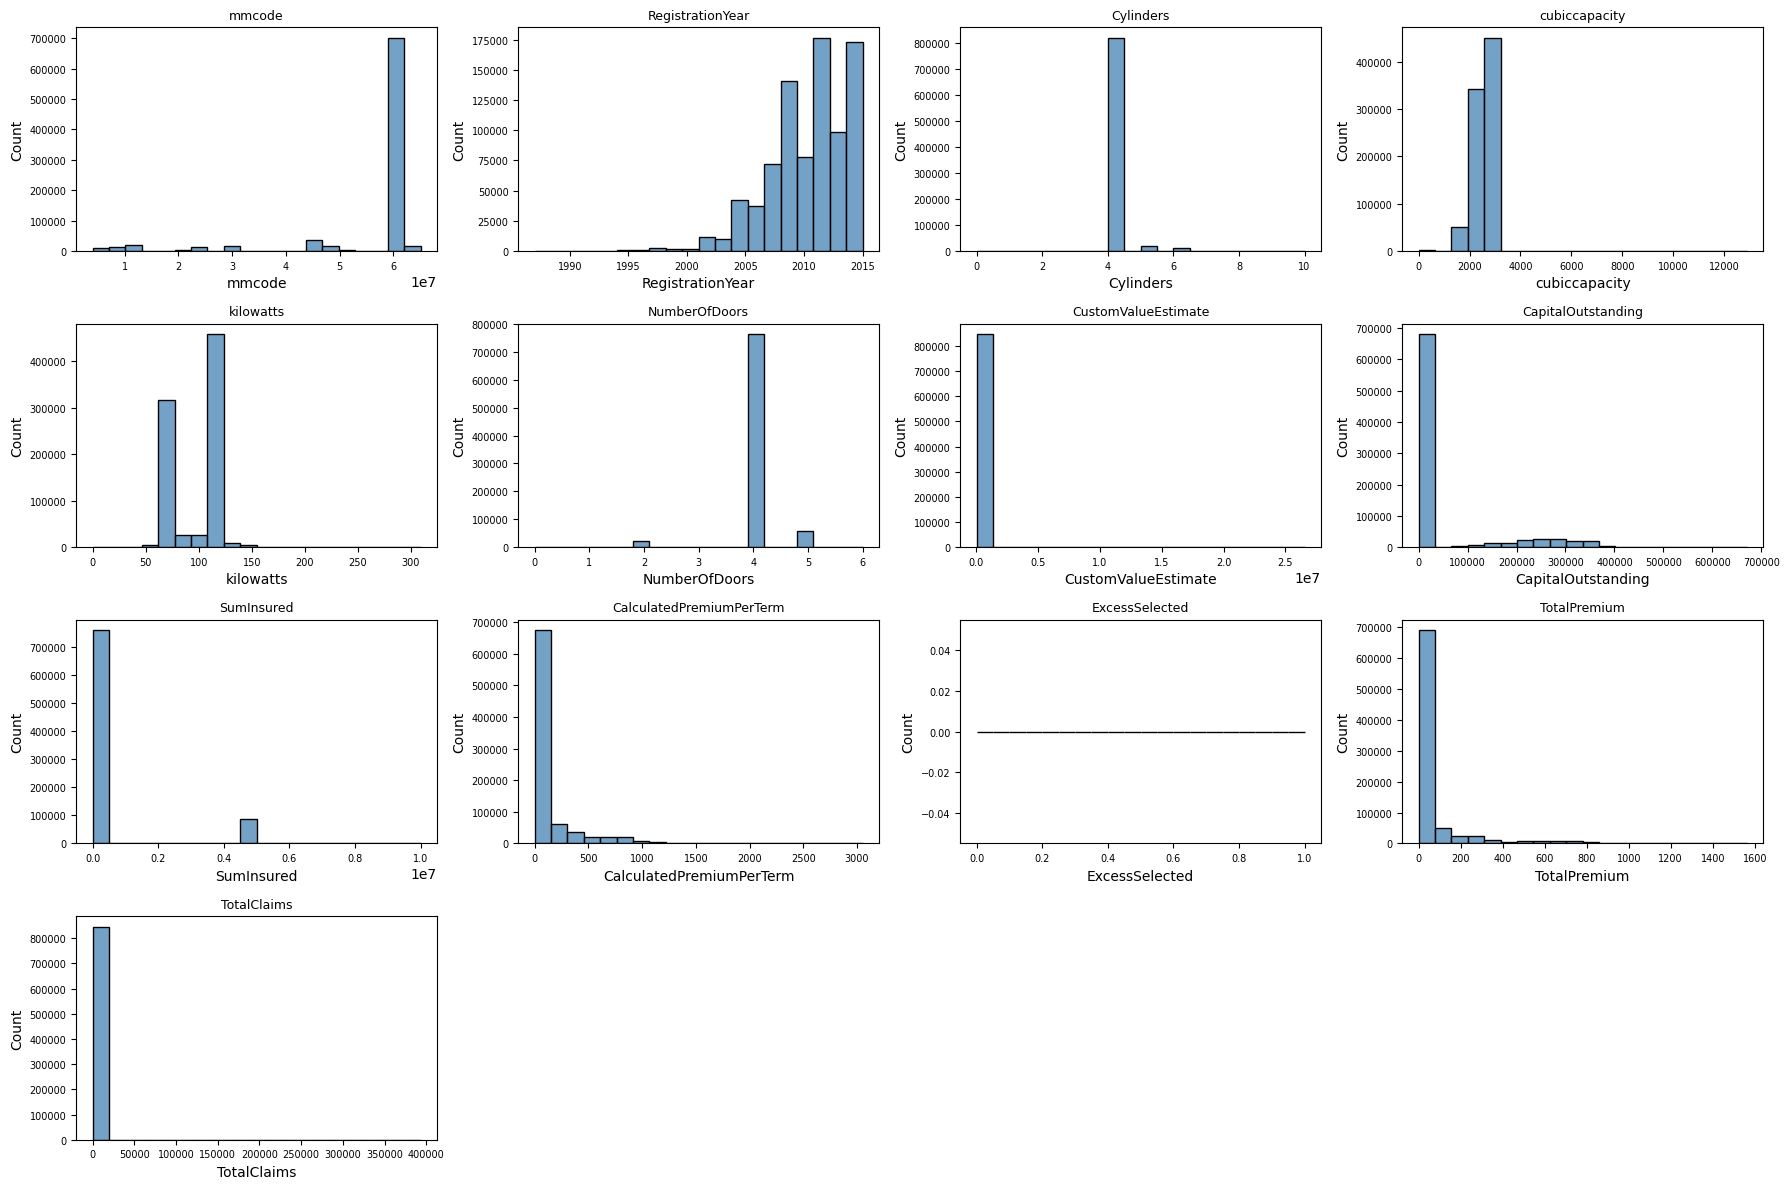

In [7]:
print("Univariate Analysis | Numerical Columns")

# Grid size
n = len(NUMERIC_COLS)
cols = 4  
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(NUMERIC_COLS):
    sns.histplot(
        clean_insurance_df[col], kde=False, bins=20, ax=axes[i], color="steelblue"
    )
    axes[i].set_title(col, fontsize=9)
    axes[i].tick_params(axis="x", labelsize=7)
    axes[i].tick_params(axis="y", labelsize=7)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Univariate Analysis | Category Columns


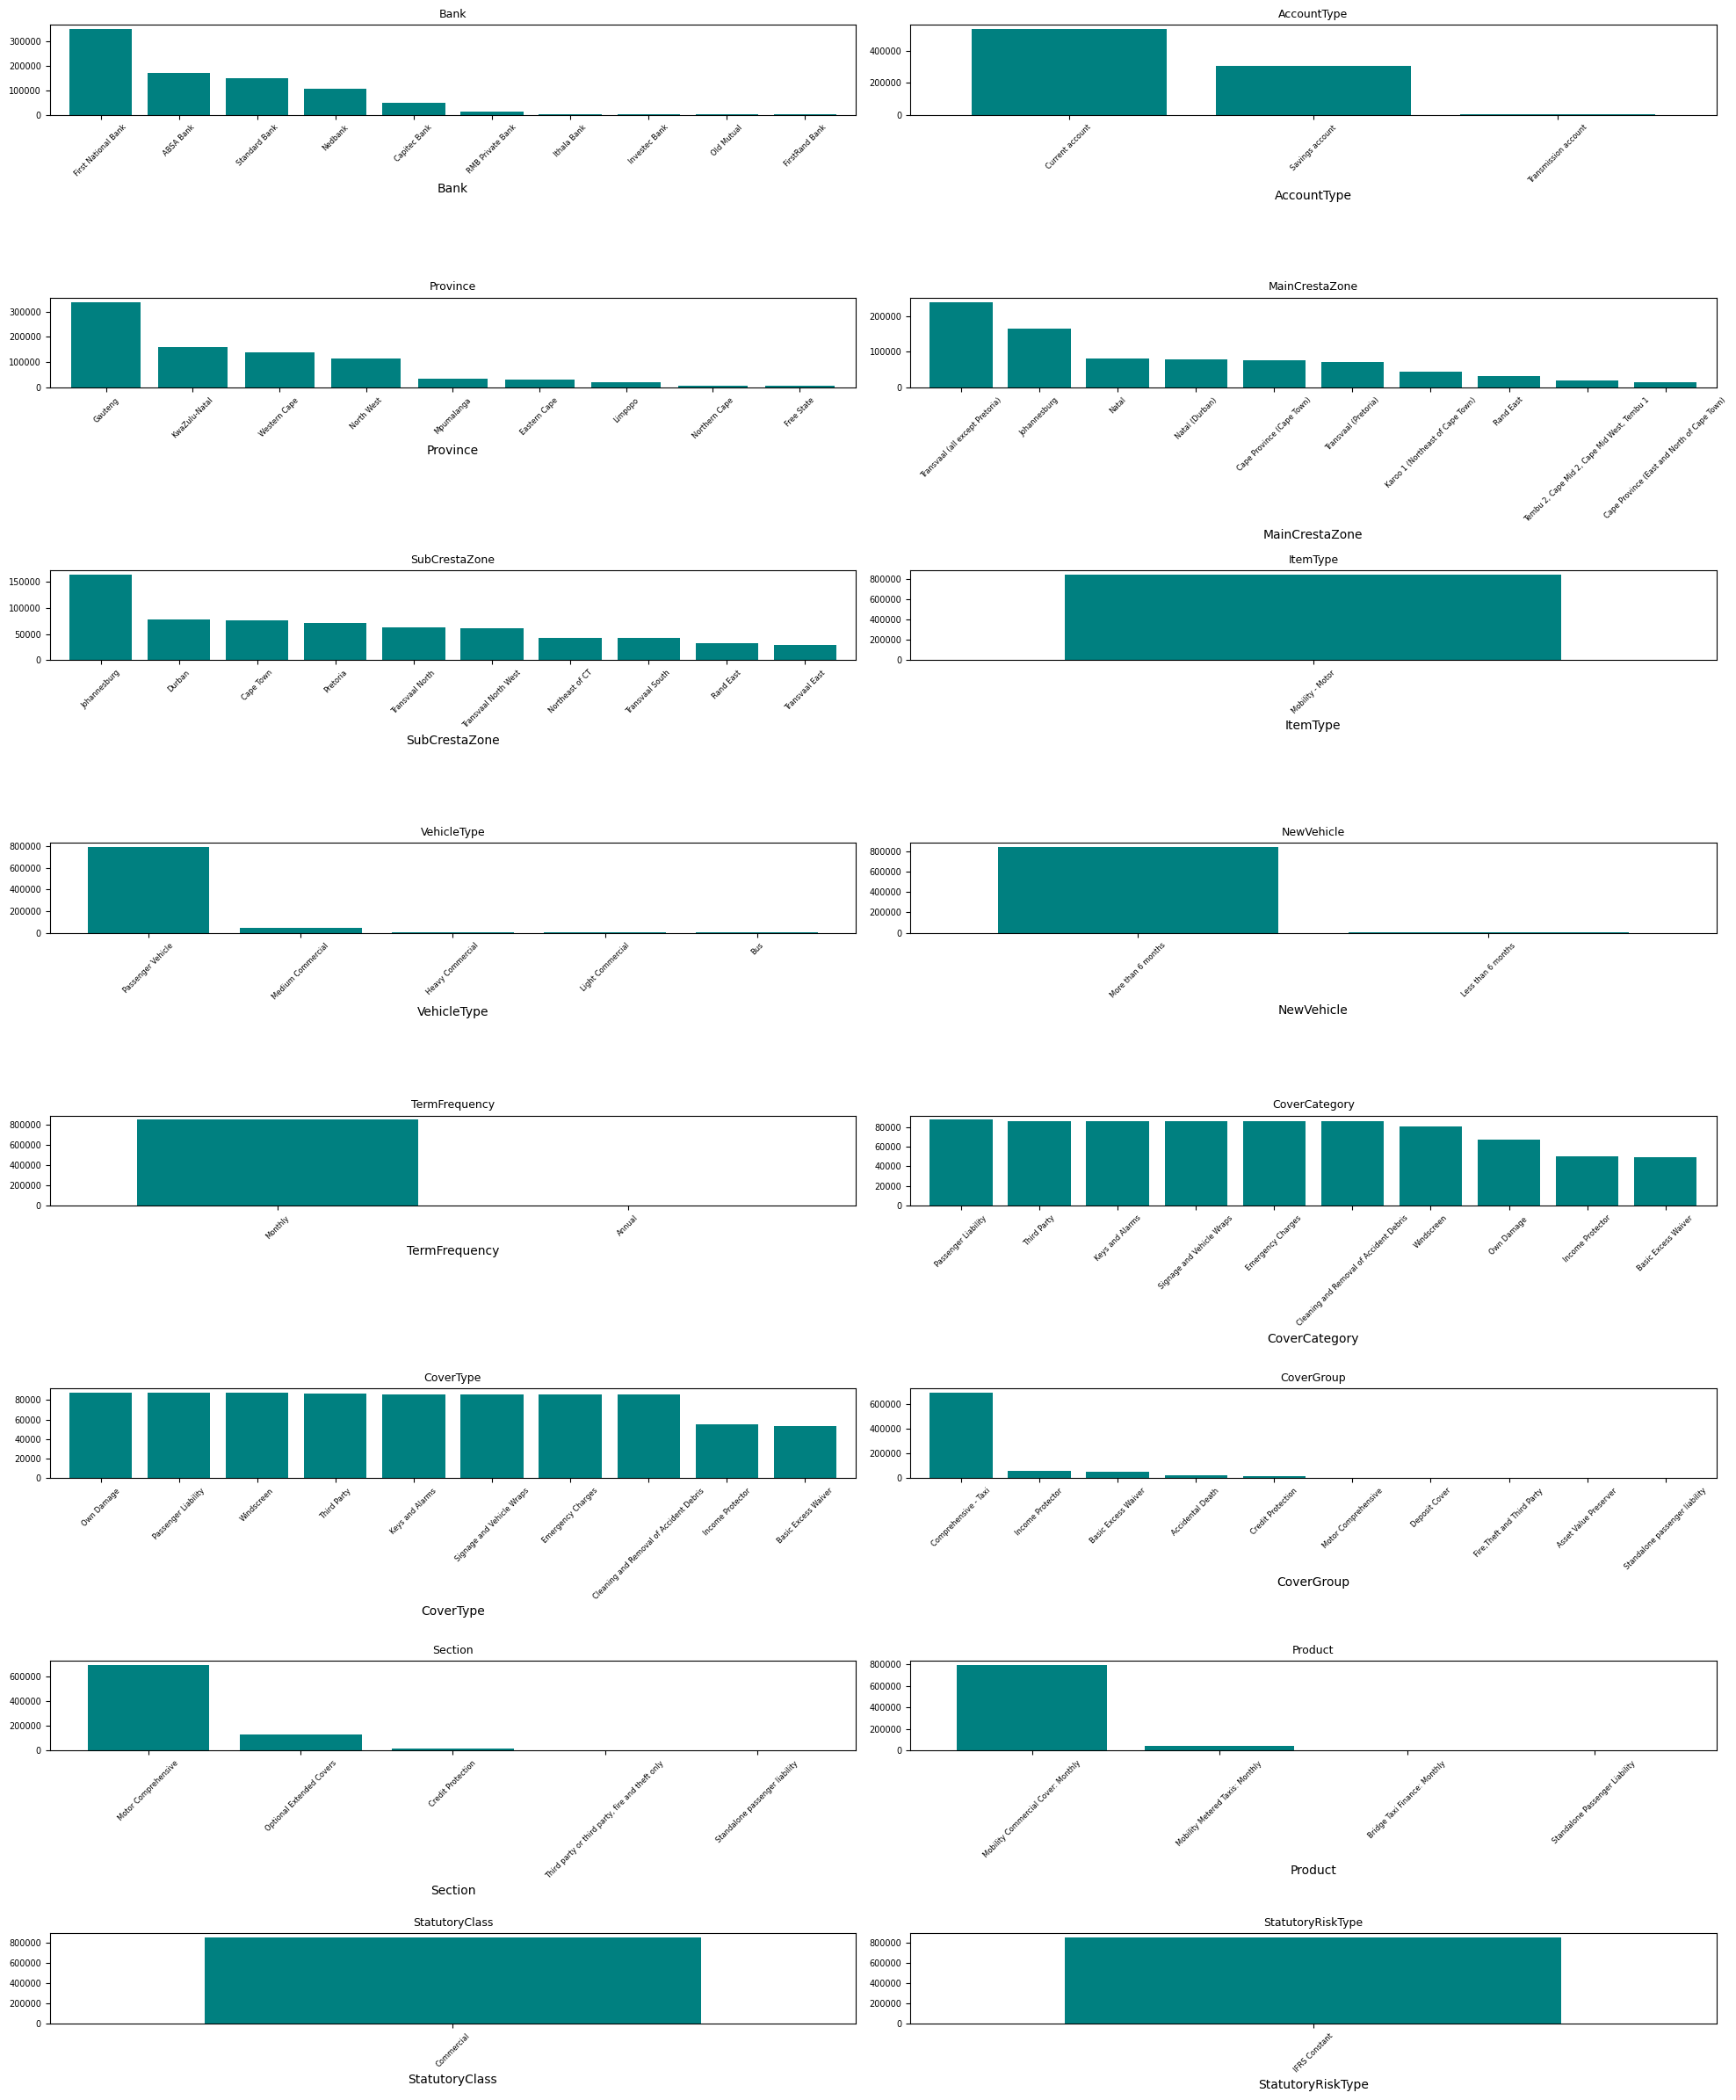

In [8]:
print("Univariate Analysis | Category Columns")



n = len(CATEGORY_COLS)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

for i, col in enumerate(CATEGORY_COLS):
    clean_insurance_df[col].value_counts().head(10).plot(
        kind="bar", ax=axes[i], color="teal", width=0.8
    )
    axes[i].set_title(col, fontsize=9)
    axes[i].tick_params(axis="x", rotation=45, labelsize=6)
    axes[i].tick_params(axis="y", labelsize=7)

# Hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [9]:
# Ensure dates
df= clean_insurance_df.copy(
    
)
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"])

# --- STEP 1: Monthly aggregation per ZipCode ---
monthly = (
    df.groupby(["PostalCode", pd.Grouper(key="TransactionMonth", freq="M")])
    .agg(TotalPremium=("TotalPremium", "sum"), TotalClaims=("TotalClaims", "sum"))
    .reset_index()
)

# --- STEP 2: Compute month-over-month changes ---
monthly = monthly.sort_values(["PostalCode", "TransactionMonth"])

monthly["premium_change"] = monthly.groupby("PostalCode")["TotalPremium"].diff()

monthly["claims_change"] = monthly.groupby("PostalCode")["TotalClaims"].diff()

/var/folders/z4/j71xz2fs1270kjsdtgg3ckzh0000gn/T/ipykernel_68746/1128772707.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(["PostalCode", pd.Grouper(key="TransactionMonth", freq="M")])


/var/folders/z4/j71xz2fs1270kjsdtgg3ckzh0000gn/T/ipykernel_68746/1733700600.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g[["premium_change", "claims_change"]].corr().iloc[0, 1])


     PostalCode  correlation
234        1426     0.811040
562        4091     0.776576
536        4027     0.776309
572        4126     0.775657
492        3651     0.774597
..          ...          ...
843        9752          NaN
845        9762          NaN
847        9830          NaN
848        9868          NaN
850        9870          NaN

[851 rows x 2 columns]


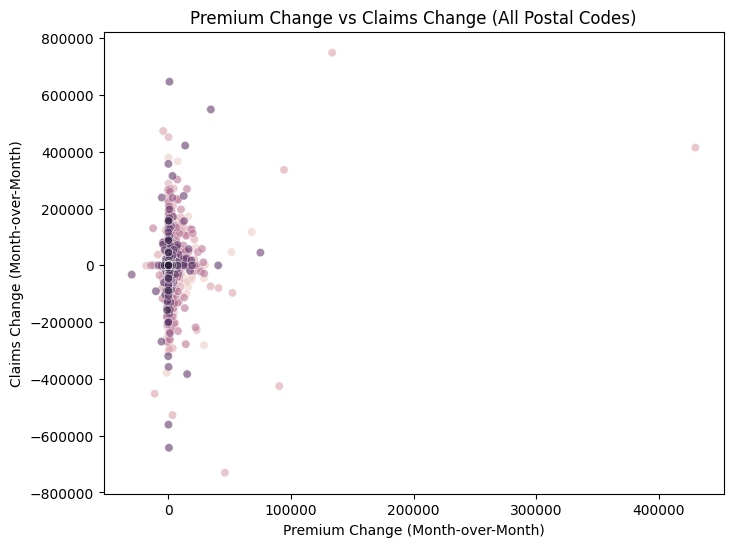

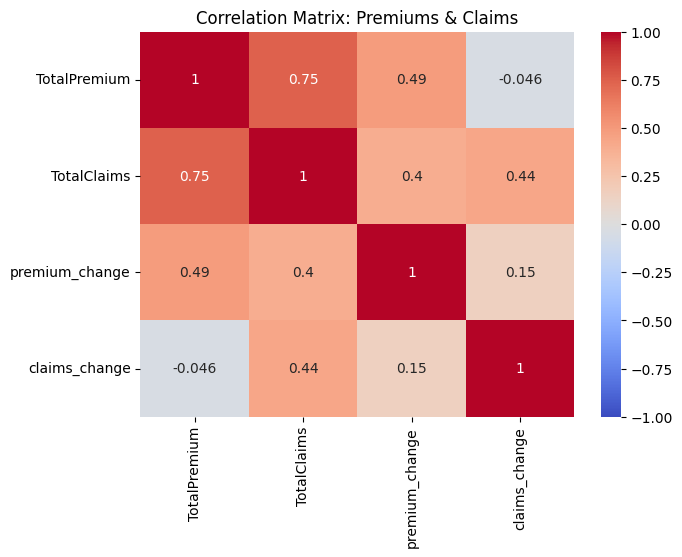

In [10]:
correlation_results = (
    monthly.groupby("PostalCode")
    .apply(lambda g: g[["premium_change", "claims_change"]].corr().iloc[0, 1])
    .rename("correlation")
    .reset_index()
)

print(correlation_results.sort_values("correlation", ascending=False))

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=monthly, x="premium_change", y="claims_change", hue="PostalCode", alpha=0.6
)
plt.title("Premium Change vs Claims Change (All Postal Codes)")
plt.xlabel("Premium Change (Month-over-Month)")
plt.ylabel("Claims Change (Month-over-Month)")
plt.legend([], [], frameon=False)  
plt.show()

corr_matrix = monthly[
    ["TotalPremium", "TotalClaims", "premium_change", "claims_change"]
].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix: Premiums & Claims")
plt.show()

Trends in Premium by PostalCode:


/var/folders/z4/j71xz2fs1270kjsdtgg3ckzh0000gn/T/ipykernel_68746/1786201367.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key=Columns.TransactionMonth.value, freq="M"),


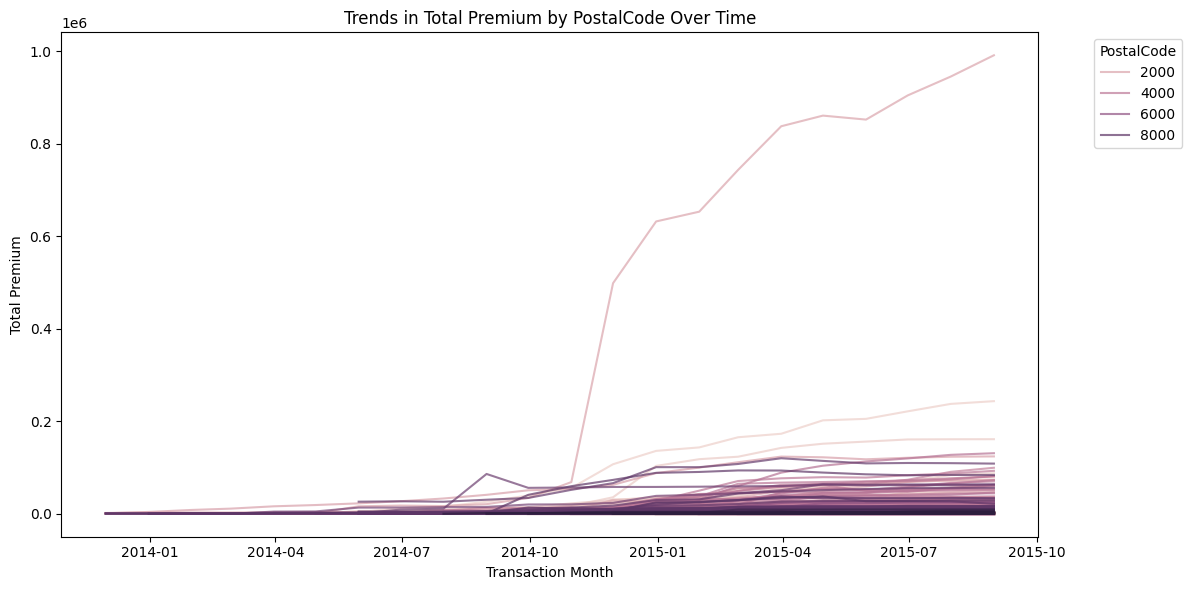

In [20]:
print("Trends in Premium by PostalCode:")
premium_trends = (
    df.groupby(
        [
            Columns.PostalCode.value,
            pd.Grouper(key=Columns.TransactionMonth.value, freq="M"),
        ]
    )
    .agg(TotalPremium=(Columns.TotalPremium.value, "sum"))
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=premium_trends,
    x=Columns.TransactionMonth.value,
    y="TotalPremium",
    hue=Columns.PostalCode.value,
    alpha=0.7,
)
plt.title("Trends in Total Premium by PostalCode Over Time")
plt.xlabel("Transaction Month")
plt.ylabel("Total Premium")
plt.legend(title="PostalCode", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

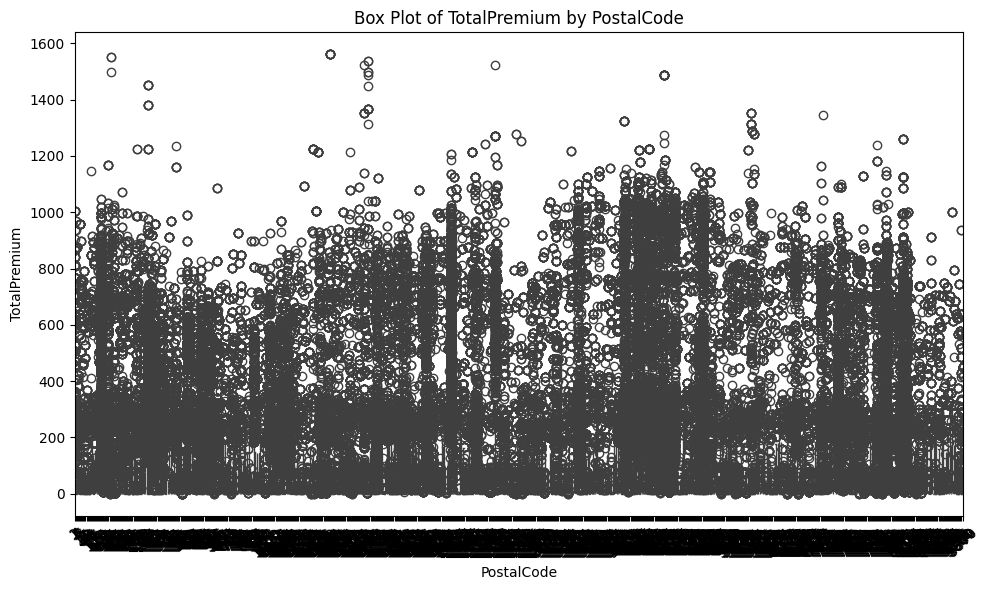

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="PostalCode", y="TotalPremium"
)  # Create a box plot by PostalCode
plt.title("Box Plot of TotalPremium by PostalCode")
plt.xlabel("PostalCode")
plt.ylabel("TotalPremium")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()